In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

**Comment:**

Need to upload the following files:

merged_with_gross_classification-table.json

merged_with_gross_classification-reports.json

gross_classifications_group_mapping.json

merged_ranking.txt

**Cheking New Gross Clssification Catrgories**

In [22]:
import json

# adjust the path if needed
with open('/content/gross_classifications_group_mapping.json', 'r') as f:
    mapping = json.load(f)

# Count total keys and those containing '- new'
total = len(mapping)
count_new = sum(1 for key in mapping if 'new' in key.lower())

print("Total unique gross classifications:", total)

Total unique gross classifications: 44


In [23]:
print("Number of keys including 'new':", count_new)

Number of keys including 'new': 16


## Reports Statistics

**Loading Data**

In [2]:
def load_observables(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    records = []
    for fname, info in data.items():
        for obs in info.get('observables', []):
            rec = obs.copy()
            rec['file'] = fname
            records.append(rec)
    return pd.DataFrame(records)

In [3]:
json_path = '/content/merged_with_gross_classification-reports.json'
df_reports = load_observables(json_path)

**Numerical Statistics**

In [4]:
def numeric_summary(df):
    # Total observables
    total_obs = len(df)
    print(f"Total observables: {total_obs}\n")

    # Unique MD files
    num_files = df['file'].nunique()
    print(f"Unique MD files: {num_files}\n")

    # Gross classification counts
    gross_counts = df['gross_classification'].value_counts()
    print(f"Total distinct gross classifications: {gross_counts.size}")
    print("Gross classification counts:")
    print(gross_counts, "\n")

    # Fine classification counts
    fine_counts = df['fine_classification'].value_counts()
    print(f"Total distinct fine classifications: {fine_counts.size}")
    print("Fine classification counts:")
    print(fine_counts, "\n")

    # Top 35 gross classifications
    print("Top 35 gross classifications:")
    print(gross_counts.head(35), "\n")

    # Artifact details counts
    ad_counts = df['artifact_details'].value_counts()
    print("Artifact details counts:")
    print(ad_counts, "\n")

    # Observables per file stats
    obs_per_file = df.groupby('file').size()
    print(f"Observables per file - max: {obs_per_file.max()}, "
          f"min: {obs_per_file.min()}, "
          f"avg: {obs_per_file.mean():.2f}\n")

    # 'New' categories in gross classification
    new_cats = [cat for cat in gross_counts.index if 'new' in cat.lower()]
    print(f"Number of 'new' gross classifications: {len(new_cats)}")
    if new_cats:
        print("New categories:", new_cats, "\n")


In [5]:
numeric_summary(df_reports)

Total observables: 6989

Unique MD files: 65

Total distinct gross classifications: 45
Gross classification counts:
gross_classification
Unknown                      1841
File                         1328
Software                      540
Malware – new                 389
Communication                 320
Attack Technique              274
Information                   268
Identifier                    248
Configuration                 187
Protocol                      170
Process                       147
Code                          146
Industrial – new              101
Credential                     98
Vulnerability                  94
Command                        89
Industrial control system      82
Device                         76
Data                           68
Service                        60
Security – new                 59
API                            56
Framework – new                50
System                         47
Cryptography – new             44
Hardware     

**Visualizations**

In [6]:
def plot_visualizations(df):
    # Define a professional Tableau-inspired palette
    artifact_colors = ["#4E79A7", "#F28E2B", "#E15759"]   # Mentioned, Described, Actionable
    gross_color = "#76B7B2"  # Soft teal
    fine_color  = "#59A14F"  # Mellow green
    ds_color    = "#B07AA1"  # Dusty purple

    # 1. Artifact Details Distribution
    ad_counts = df['artifact_details'].value_counts()
    plt.figure(figsize=(6, 4))
    bars = ad_counts.plot(kind='bar', color=artifact_colors, edgecolor='black')
    plt.title("Artifact Details Distribution", fontsize=14, weight='bold')
    plt.xlabel("Artifact Details", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(f"{int(p.get_height())}",
                      (p.get_x() + p.get_width()/2, p.get_height() + 5),
                      ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 2. Top 35 Gross Classifications (largest at top)
    gross_counts = df['gross_classification'].value_counts().head(35)
    gross_sorted = gross_counts.sort_values(ascending=True)
    plt.figure(figsize=(8, 10))
    bars = gross_sorted.plot(kind='barh', color=gross_color, edgecolor='black')
    plt.title("Top 35 Gross Classifications", fontsize=14, weight='bold')
    plt.xlabel("Count", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    for p in bars.patches:
        bars.annotate(f"{int(p.get_width())}",
                      (p.get_width() + 5, p.get_y() + p.get_height()/2),
                      va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 3. Top 20 Fine Classifications (largest at top)
    fine_counts = df['fine_classification'].value_counts().head(20)
    fine_sorted = fine_counts.sort_values(ascending=True)
    plt.figure(figsize=(8, 8))
    bars = fine_sorted.plot(kind='barh', color=fine_color, edgecolor='black')
    plt.title("Top 20 Fine Classifications", fontsize=14, weight='bold')
    plt.xlabel("Count", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    for p in bars.patches:
        bars.annotate(f"{int(p.get_width())}",
                      (p.get_width() + 5, p.get_y() + p.get_height()/2),
                      va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 4. Top 10 Data Sources
    ds_counts = df['data_source'].value_counts().head(10)
    plt.figure(figsize=(8, 4))
    bars = ds_counts.plot(kind='bar', color=ds_color, edgecolor='black')
    plt.title("Top 10 Data Sources", fontsize=14, weight='bold')
    plt.xlabel("Data Source", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(f"{int(p.get_height())}",
                      (p.get_x() + p.get_width()/2, p.get_height() + 2),
                      ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()


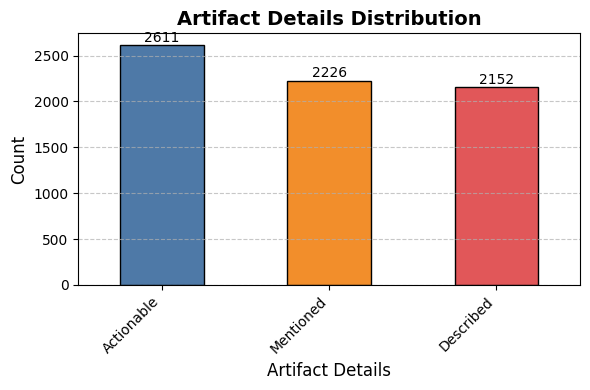

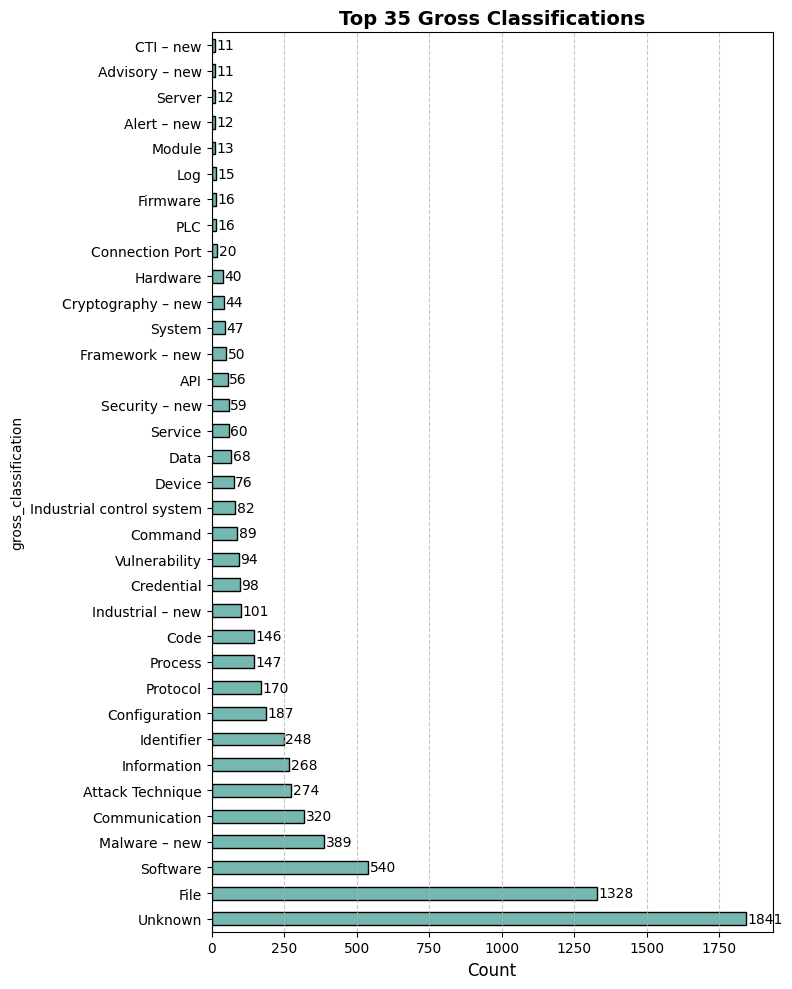

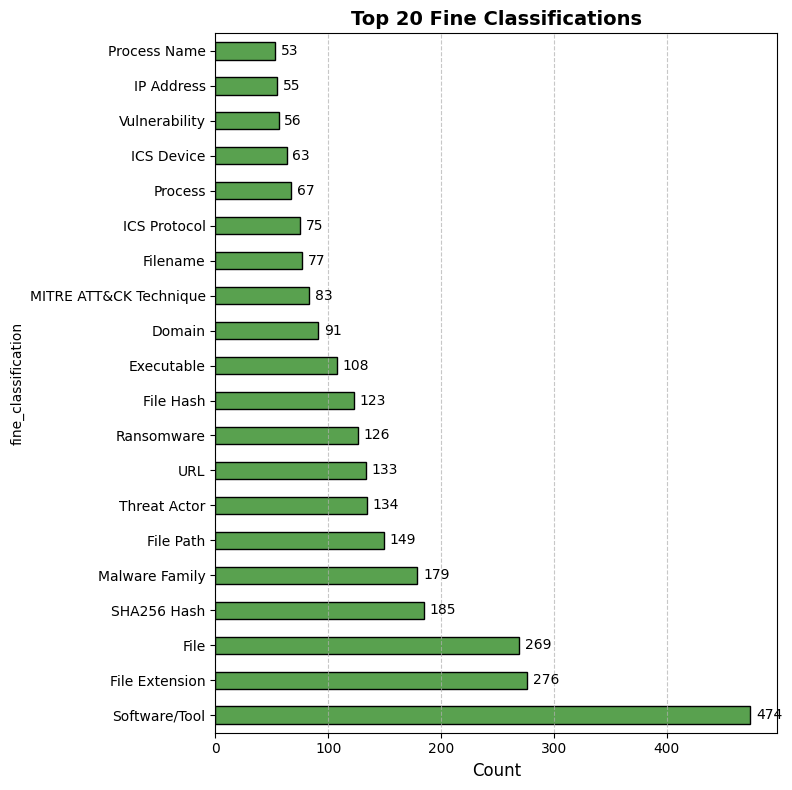

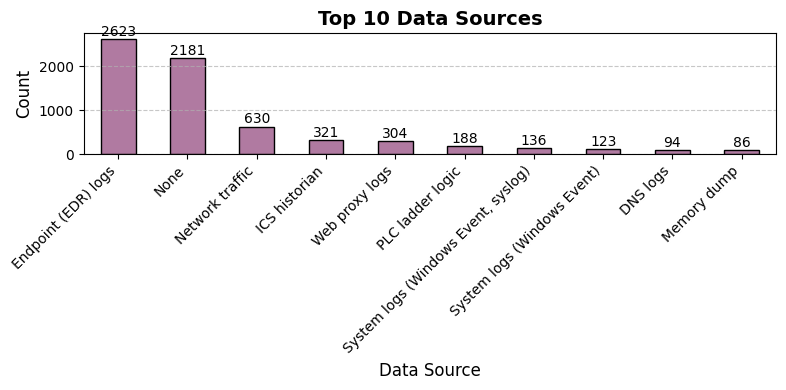

In [7]:
plot_visualizations(df_reports)

## Procedure Description Table Statistics

**Loading Data**

In [8]:
def load_observables(json_path):
    """
    Load and flatten the table JSON into a DataFrame.
    Handles both dict-of-files (with 'observables' lists) and list formats.
    """
    with open(json_path, 'r') as f:
        data = json.load(f)
    records = []
    if isinstance(data, dict) and 'observables' in next(iter(data.values())):
        for fname, info in data.items():
            for obs in info['observables']:
                rec = obs.copy()
                rec['file'] = fname
                records.append(rec)
    else:
        records = data
    return pd.DataFrame(records)

In [9]:
table_path = "/content/merged_with_gross_classification-table.json"
df_table = load_observables(table_path)

**Numerical Statistics**

In [10]:
def numeric_summary_table(df):
    """Print numeric summaries for the table data."""
    print("=== Numeric Summary for Table Data ===\n")

    # Total observables
    total_obs = len(df)
    print(f"Total observables: {total_obs}\n")

    # Unique MD file names
    if 'file' in df.columns:
        unique_files = df['file'].nunique()
        print(f"Unique MD files: {unique_files}\n")

    # Gross classification counts
    gross_counts = df['gross_classification'].value_counts()
    print(f"Total distinct gross classifications: {gross_counts.size}")
    print("Gross classification counts:")
    print(gross_counts, "\n")

    # Fine classification counts
    fine_counts = df['fine_classification'].value_counts()
    print(f"Total distinct fine classifications: {fine_counts.size}")
    print("Fine classification counts:")
    print(fine_counts, "\n")

    # Top 35 gross classifications
    print("Top 35 gross classifications:")
    print(gross_counts.head(35), "\n")

    # Artifact details counts
    ad_counts = df['artifact_details'].value_counts()
    print("Artifact details counts:")
    print(ad_counts, "\n")

    # Top 10 data sources
    ds_counts = df['data_source'].value_counts().head(10)
    print("Top 10 data sources:")
    print(ds_counts, "\n")

    # Observables per file stats
    if 'file' in df.columns:
        obs_per_file = df.groupby('file').size()
        print("Observables per file - max: {}, min: {}, avg: {:.2f}".format(
            obs_per_file.max(), obs_per_file.min(), obs_per_file.mean()
        ))
        print()


In [11]:
numeric_summary_table(df_table)

=== Numeric Summary for Table Data ===

Total observables: 445

Total distinct gross classifications: 31
Gross classification counts:
gross_classification
Unknown                      133
Communication                 60
Software                      51
File                          32
Code                          16
Protocol                      12
Malware – new                 10
Industrial control system     10
API                           10
Server                        10
Attack Technique               9
Process                        8
Configuration                  8
Device                         7
Information                    7
Industrial – new               6
Command                        6
Service                        6
Credential                     6
Data                           5
Log                            5
Vulnerability                  5
Hardware                       5
Identifier                     3
System                         3
Connection Port     

**Visualizations**

In [12]:
def plot_table_visualizations(df):
    """Generate polished, annotated plots for the table data."""
    # Define a professional Tableau-inspired palette
    artifact_colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]
    gross_color     = "#76B7B2"
    fine_color      = "#59A14F"
    ds_color        = "#B07AA1"

    # 1. Artifact Details Distribution
    ad_counts = df['artifact_details'].value_counts()
    plt.figure(figsize=(6,4))
    bars = ad_counts.plot(kind='bar', color=artifact_colors[:len(ad_counts)], edgecolor='black')
    plt.title("Artifact Details Distribution", fontsize=14, weight='bold')
    plt.xlabel("Artifact Details", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(f"{int(p.get_height())}",
                      (p.get_x() + p.get_width()/2, p.get_height()+5),
                      ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 2. Top 35 Gross Classifications (largest at top)
    gross = df['gross_classification'].value_counts().head(35).sort_values(ascending=True)
    plt.figure(figsize=(8,10))
    bars = gross.plot(kind='barh', color=gross_color, edgecolor='black')
    plt.title("Top 35 Gross Classifications", fontsize=14, weight='bold')
    plt.xlabel("Count", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    for p in bars.patches:
        bars.annotate(f"{int(p.get_width())}",
                      (p.get_width() + 5, p.get_y() + p.get_height()/2),
                      va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 3. Top 20 Fine Classifications (largest at top)
    fine = df['fine_classification'].value_counts().head(20).sort_values(ascending=True)
    plt.figure(figsize=(8,8))
    bars = fine.plot(kind='barh', color=fine_color, edgecolor='black')
    plt.title("Top 20 Fine Classifications", fontsize=14, weight='bold')
    plt.xlabel("Count", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.gca().invert_yaxis()
    for p in bars.patches:
        bars.annotate(f"{int(p.get_width())}",
                      (p.get_width() + 5, p.get_y() + p.get_height()/2),
                      va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # 4. Top 10 Data Sources
    ds = df['data_source'].value_counts().head(10)
    plt.figure(figsize=(8,4))
    bars = ds.plot(kind='bar', color=ds_color, edgecolor='black')
    plt.title("Top 10 Data Sources", fontsize=14, weight='bold')
    plt.xlabel("Data Source", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(f"{int(p.get_height())}",
                      (p.get_x() + p.get_width()/2, p.get_height()+2),
                      ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()


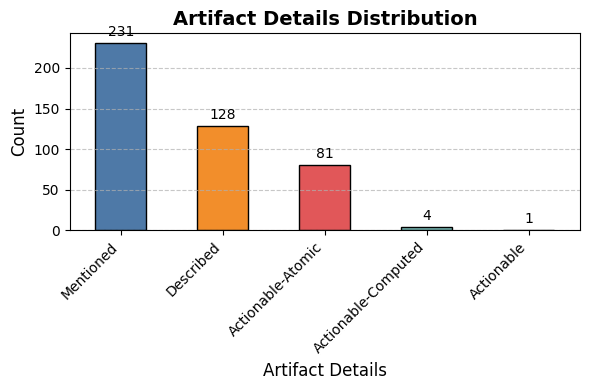

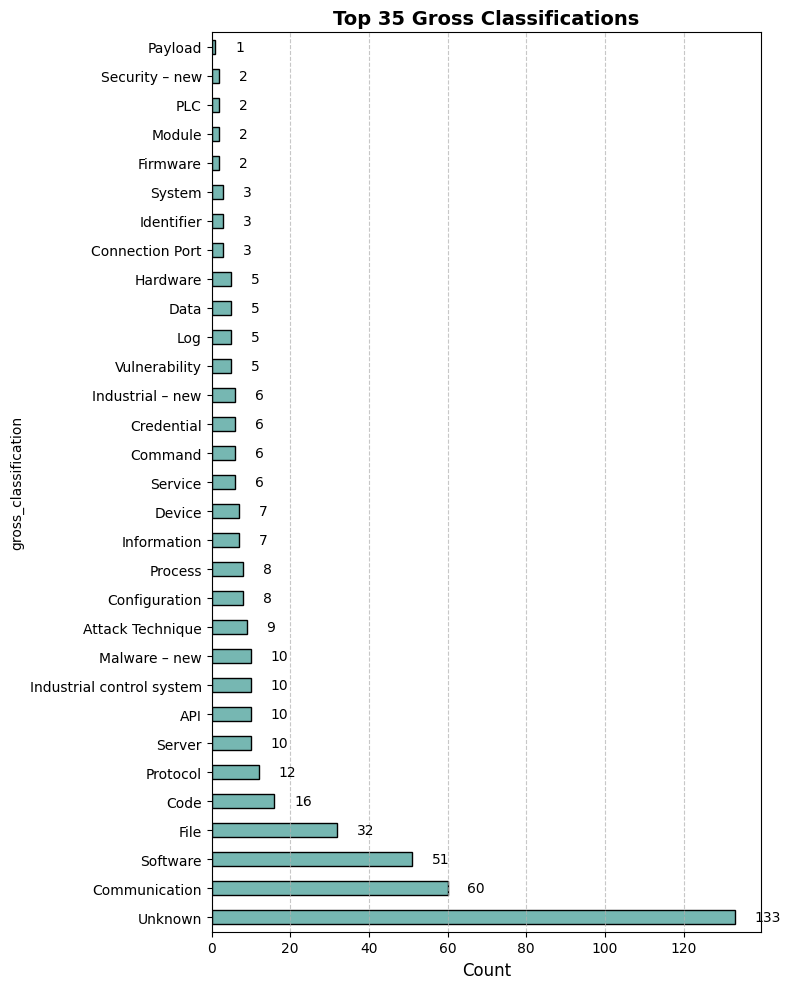

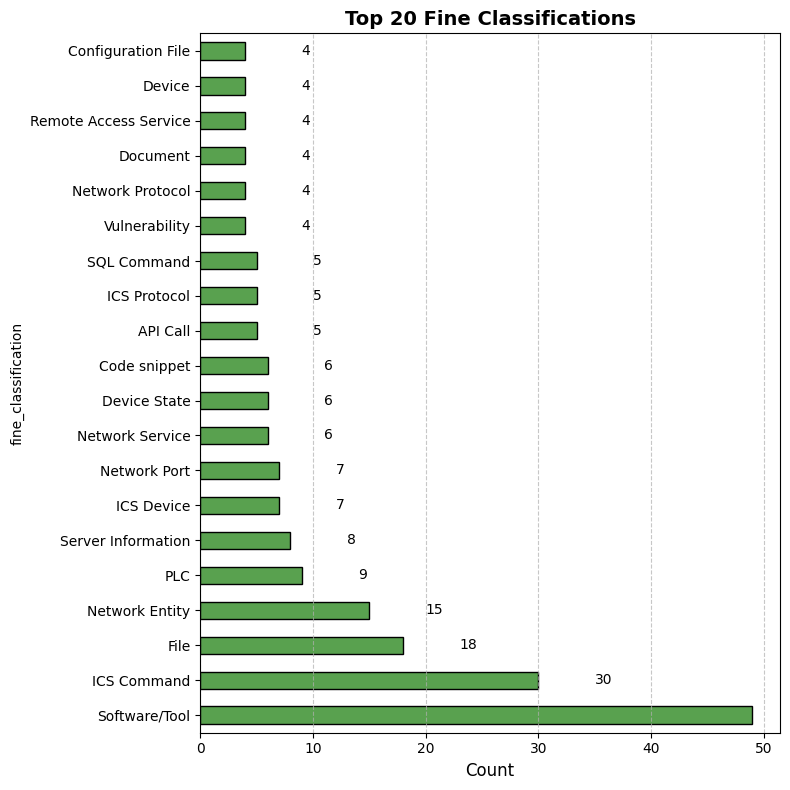

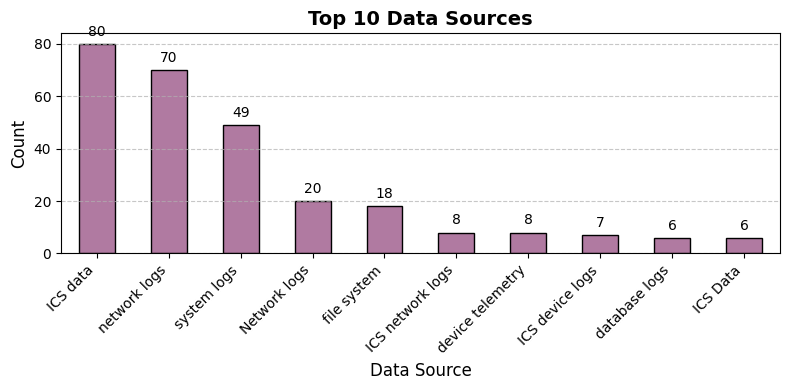

In [13]:
plot_table_visualizations(df_table)

## Ranking Results

**Data Loading**

In [14]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt

def load_ranking_results(path):
    records = []
    current_file = None
    with open(path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('====='):
                continue
            if line.lower().startswith('md file name:'):
                current_file = line.split(':', 1)[1].strip()
                continue
            if line.startswith('|'):
                parts = line.split('|')
                if len(parts) < 4:
                    continue
                idx_str, arrow_part, judgment_part = parts[1].strip(), parts[2].strip(), parts[3].strip()
                if '→' not in arrow_part:
                    continue
                try:
                    idx = int(idx_str)
                except:
                    continue
                obs_val, orig_rank = [s.strip('` ') for s in arrow_part.split('→',1)]
                if 'INCORRECT' in judgment_part:
                    judgment = 'INCORRECT'
                    m = re.search(r'should be "([^"]+)"', judgment_part)
                    should_be = m.group(1) if m else None
                else:
                    judgment = 'CORRECT'
                    should_be = orig_rank
                records.append({
                    'file': current_file,
                    'observable_id': idx,
                    'observable_value': obs_val,
                    'original_rank': orig_rank,
                    'validator_judgment': judgment,
                    'should_be_rank': should_be
                })
    return pd.DataFrame(records)

In [15]:
# Load, summarize, and plot
df_rank = load_ranking_results('/content/merged_ranking.txt')

**Numerical Statistics**

In [16]:
def numeric_summary_ranking(df):
    total = len(df)
    correct = df['validator_judgment'].eq('CORRECT').sum()
    incorrect = df['validator_judgment'].eq('INCORRECT').sum()
    acc = correct/total*100
    print("=== Ranking Validation Summary ===")
    print(f"Total: {total}, Correct: {correct}, Incorrect: {incorrect}")
    print(f"Overall accuracy: {acc:.2f}%\n")
    by_orig = df.groupby('original_rank')['validator_judgment'] \
                .value_counts().unstack(fill_value=0)
    by_orig['accuracy_pct'] = by_orig['CORRECT'] / by_orig.sum(axis=1) * 100
    print("Accuracy by Original Rank (%):")
    print(by_orig[['CORRECT','INCORRECT','accuracy_pct']], "\n")
    mis = df[df['validator_judgment']=='INCORRECT']
    pairs = mis.groupby(['original_rank','should_be_rank']) \
               .size().sort_values(ascending=False).head(10)
    print("Top 10 misclassification mappings:")
    print(pairs, "\n")

In [17]:
numeric_summary_ranking(df_rank)

=== Ranking Validation Summary ===
Total: 6094, Correct: 5808, Incorrect: 286
Overall accuracy: 95.31%

Accuracy by Original Rank (%):
validator_judgment   CORRECT  INCORRECT  accuracy_pct
original_rank                                        
"Actionable"              59          3     95.161290
"Described"               91          3     96.808511
"Mentioned"              122          2     98.387097
0x00` → `Actionable        0          1      0.000000
Actionable              2039        175     92.095754
Described               1682         67     96.169240
Mentioned               1815         35     98.108108 

Top 10 misclassification mappings:
original_rank  should_be_rank
Actionable     Described         156
Described      Actionable         57
Mentioned      Described          24
Actionable     Mentioned          19
Mentioned      Actionable         11
Described      Mentioned          10
"Actionable"   Described           3
"Mentioned"    Described           2
"Described"    M

**Visualizations**

In [18]:
import matplotlib.pyplot as plt

def plot_ranking_visualizations(df):
    # Filter to only expected original ranks
    valid_ranks = ["Mentioned", "Described", "Actionable"]
    df_clean = df[df['original_rank'].isin(valid_ranks)]

    # Correct vs Incorrect (on cleaned set to avoid artifacts)
    counts = df_clean['validator_judgment'].value_counts()
    colors = ["#4E79A7", "#E15759"]
    plt.figure(figsize=(6,4))
    bars = counts.plot(kind='bar', color=colors, edgecolor='black')
    plt.title("Validator: Correct vs Incorrect", weight='bold')
    plt.xlabel("Judgment")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(int(p.get_height()),
                      (p.get_x() + p.get_width()/2, p.get_height() + 5),
                      ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

    # Accuracy by Original Rank
    by_orig = (
        df_clean
        .groupby('original_rank')['validator_judgment']
        .value_counts()
        .unstack(fill_value=0)
    )
    by_orig['accuracy_pct'] = by_orig['CORRECT'] / by_orig.sum(axis=1) * 100
    accuracy = by_orig['accuracy_pct'].sort_values(ascending=True)

    plt.figure(figsize=(8,6))
    bars = accuracy.plot(kind='barh', color="#76B7B2", edgecolor='black')
    plt.title("Accuracy by Original Rank", weight='bold')
    plt.xlabel("Accuracy (%)")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    for p in bars.patches:
        bars.annotate(f"{p.get_width():.1f}%",
                      (p.get_width() + 1, p.get_y() + p.get_height()/2),
                      va='center')
    plt.tight_layout()
    plt.show()


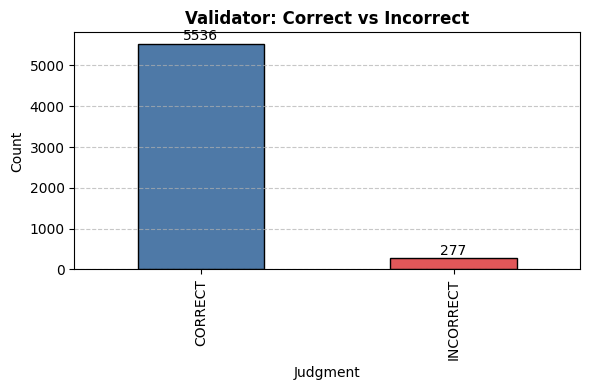

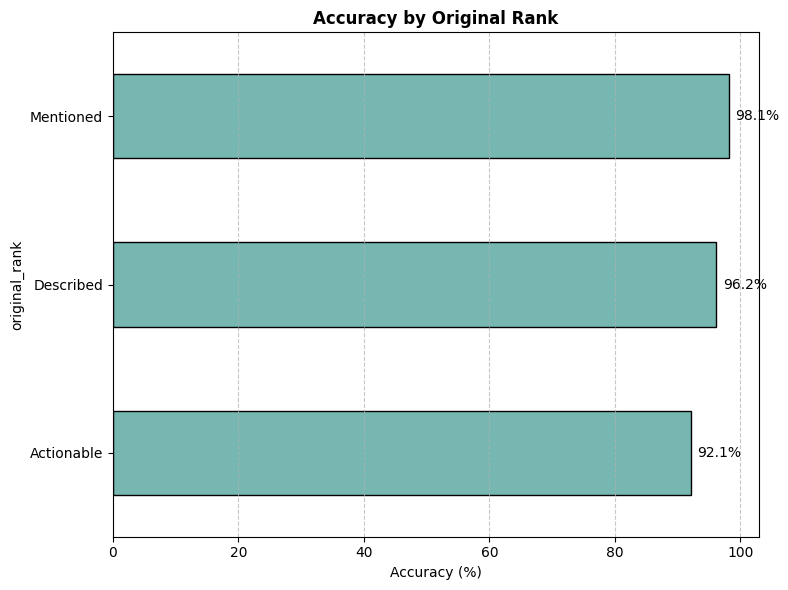

In [19]:
plot_ranking_visualizations(df_rank)